In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
data_1=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\output_50_pred_1.csv",skiprows =1,header=None)
data_2=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\output_50_pred_2.csv",skiprows =1,header=None)
data_1


,0,1,2,3,4,5,6
0,12074777530,NaN,instructions,6.756513e+09,100.0,NaN,NaN
1,2001353777,NaN,branches,6.756503e+09,100.0,NaN,NaN
2,4590186,NaN,dTLB-load-misses,6.756485e+09,100.0,NaN,NaN
3,867840158,NaN,br_inst_retired.near_taken,6.756463e+09,100.0,NaN,NaN
4,13426701,NaN,LLC-load-misses,6.756434e+09,100.0,NaN,NaN
...,...,...,...,...,...,...,...
294,12084617641,NaN,instructions,6.875680e+09,100.0,NaN,NaN
295,2004044411,NaN,branches,6.875669e+09,100.0,NaN,NaN
296,4535121,NaN,dTLB-load-misses,6.875652e+09,100.0,NaN,NaN
297,868610348,NaN,br_inst_retired.near_taken,6.875629e+09,100.0,NaN,NaN


In [60]:
def add_param_values(param_list,val):
    param_list.append(int(val))
    return param_list

data_li=[data_1,data_2]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,0]
    instructions_li=[]
    br_inst_retired_near_taken_li=[]
    llc_load_misses_li=[]
    dtlb_load_misses_li=[]
    branches_li=[]
    for i in range(0,len(row_1),6):
        instructions_li=add_param_values(instructions_li,row_1[i])
    for i in range(1,len(row_1),6):
        branches_li=add_param_values(branches_li,row_1[i])
    for i in range(2,len(row_1),6):
        dtlb_load_misses_li=add_param_values(dtlb_load_misses_li,row_1[i])
    for i in range(3,len(row_1),6):
        br_inst_retired_near_taken_li=add_param_values(br_inst_retired_near_taken_li,row_1[i])
    for i in range(4,len(row_1),6):
        llc_load_misses_li=add_param_values(llc_load_misses_li,row_1[i])
    data_dict[j]={"instructions":instructions_li,"branches":branches_li,"br_inst_retired_near_taken":br_inst_retired_near_taken_li,
                    "llc_load_misses":llc_load_misses_li,"dtlb_load_misses":dtlb_load_misses_li}
    j+=1

In [61]:

data_dict[0]["instructions"]
    

[12074777530,
 12074658515,
 12275050774,
 12076357311,
 12063718287,
 12084528547,
 12078379625,
 12072761287,
 12079956116,
 12073797771,
 12075417684,
 12081409656,
 12074872681,
 12070683474,
 12091893767,
 12084741626,
 12066349351,
 12097749857,
 12076065825,
 12996629113,
 12070971791,
 12077390756,
 12082480235,
 12074547810,
 12079704751,
 12069826913,
 12088370741,
 12088456067,
 12080981348,
 12060619720,
 12076675898,
 12069612448,
 12073685038,
 12068103524,
 12082973919,
 12062031268,
 12084507112,
 12068928116,
 12081176008,
 12085772325,
 12078725258,
 12086945553,
 12071149258,
 12074060736,
 12067589079,
 12087098036,
 12080765266,
 12107750963,
 12064930508,
 12084617641]

In [62]:
time_li=[]
for i in range(1,len(data_dict[0]["instructions"])+1,1):
    time_li.append(i)
print(time_li)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [63]:
len(data_dict[1]["instructions"])

50

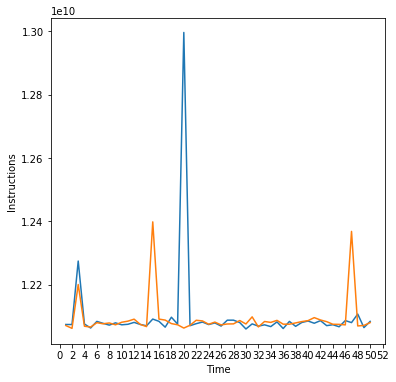

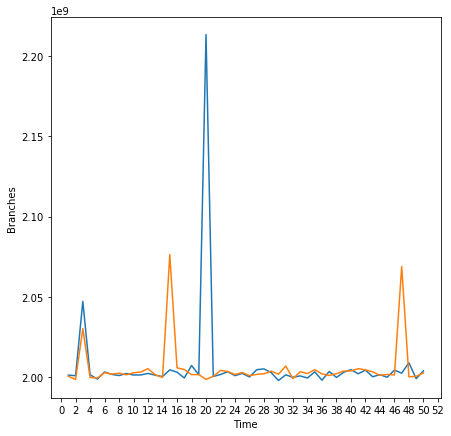

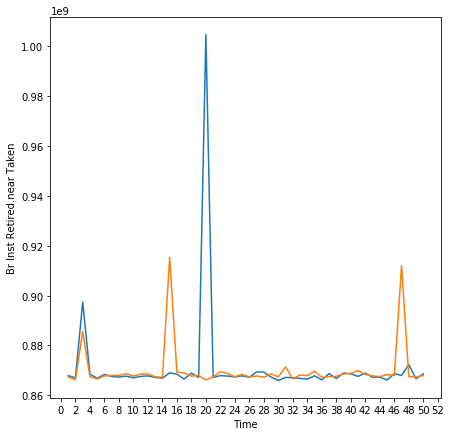

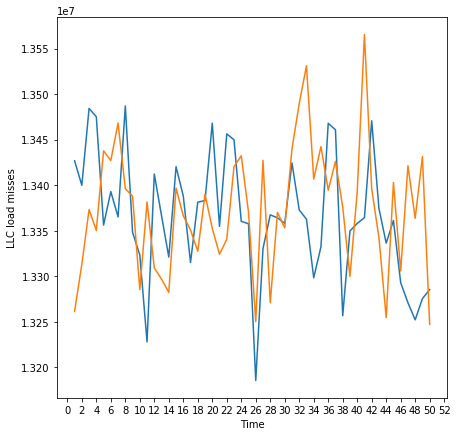

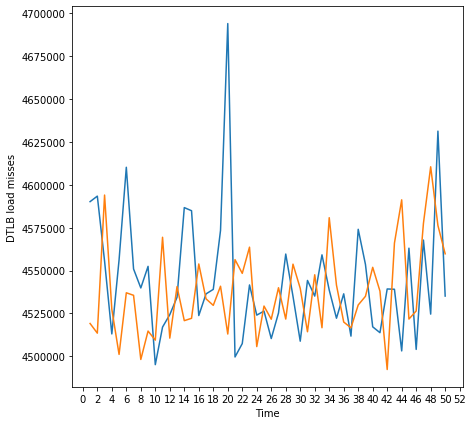

In [70]:
import matplotlib.ticker as plticker
params_dict_keys=["instructions","branches","br_inst_retired_near_taken","llc_load_misses","dtlb_load_misses"]
params=["Instructions","Branches","Br Inst Retired.near Taken","LLC load misses", "DTLB load misses"]

for i in range(5):
    df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[i]],"adversarial": data_dict[1][params_dict_keys[i]],"time":time_li
    }, )
    
    fig, ax = plt.subplots()
    plt. rcParams["figure.figsize"] = (7,7)
    ax.plot("time","clean",data=df)
    ax.plot("time","adversarial",data=df)
    plt.xlabel("Time")
    plt.ylabel(params[i])
    loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
    locy = plticker.MultipleLocator(base=10)
    ax.xaxis.set_major_locator(loc)
    #ax.yaxis.set_major_locator(locy)
    plt.show()
    
# time_li=data_dict[0]["time"]
# time_li.pop()
# for i in range(5):
#     df = pd.DataFrame({"clean": data_dict[1][params_dict_keys[i]],"time":time_li
#     }, )
#     fig, ax = plt.subplots()
#     plt. rcParams["figure.figsize"] = (6,6)
#     ax.plot("time","clean",data=df)
#     plt.xlabel("Time")
#     plt.ylabel(params[i])
#     plt.show()
